# Regression(회귀)

## y = ax + b
## y = theta0 + theta1*x
## 임의의 값 넣어보기 theta0 = 1, theta = 2



In [4]:
class Y_pred():
    def __init__(self, theta_0, theta_1):
        self.theta_0 = theta_0
        self.theta_1 = theta_1

    
def out_y_hat(self, input_x):
    y_hat_row = []
    for i in range(len(input_x)):
        y_hat = self.theta_0 + self.theta_1*input_x[i]
        y_hat_row.append(y_hat)
    
    return y_hat_row

Y_pred.y_hat = out_y_hat

In [5]:
Y_pred_C = Y_pred(theta_0= 1 , theta_1= 2)

In [6]:
x = [1000]
Y_pred_C.y_hat(input_x = x)

[2001]

In [7]:
x = [580, 700, 810, 840]
Y_pred_C = Y_pred(theta_0= 1 , theta_1= 2)
Y_pred_C.y_hat(input_x = x)

[1161, 1401, 1621, 1681]

### Optimization Problem (최적화 문제)
### 목적함수

- 손실함수는 MSE 외에도 다양하게 존재합니다.
- 목적함수 또한 Sum of Square Error(SSE) 외에도 다양하게 존재합니다.
- 결국 손실함수와 목적함수는 서로 비슷한 의미를 내포하고 있습니다.
- 목적함수는 어떤 값을 낮추거나 높이는 목적을 가지는 함수이다

In [11]:
import numpy as np

y_label_total = [374, 385, 375, 401] # 실제값
y_hat_total = [1161, 1401, 1621, 1681] # 임의의 수로 예측한 결과

diff_row = []

for i in range(len(y_hat_total)):
    diff = y_label_total[i] - y_hat_total[i]
    diff_row.append(diff)
    square = np.square(diff_row)
    sse = 1/2 * (np.sum(square))

print("diff = {} \nsquare = {} \nSSE = {}".format(diff, square, sse))

diff = -1280 
square = [ 619369 1032256 1552516 1638400] 
SSE = 2421270.5


## 경사하강법
-  := 는 정의하다라는 기호로 계산한 값으로 갱신한다
-  에타는 Learning Rate로 학습률이다

### 학습률 : 1
### 에폭 : 3
### x : 3

In [12]:
def g(x, eta):
    print("현재 x값 : ", x)
    epoch_1_x = x - eta*((2*x)-2)
    print("첫 번째 에폭 x 값 : {}".format(epoch_1_x))

    epoch_2_x = epoch_1_x - eta*((2*epoch_1_x)-2)
    print("두 번째 에폭 x 값 : {}".format(epoch_2_x))

    epoch_3_x = epoch_2_x - eta*((2*epoch_2_x)-2)
    print("세 번째 에폭 x 값 : {}".format(epoch_3_x))

result = g(x = 3, eta = 1)

현재 x값 :  3
첫 번째 에폭 x 값 : -1
두 번째 에폭 x 값 : 3
세 번째 에폭 x 값 : -1


### 학습률 : 0.01
### 반복갱신횟수 : 10
### x : 3

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def g(learning_rate, epoch_count, random_value_bool = False, x = 3):
    if random_value_bool:
        x = np.random.normal(0, 1, 1)

    print("Now 'x' Value : ", x)
    print("Now Learning Rate Value : ", learning_rate)

    x_row = []

    for i in range(epoch_count):
        x = x - learning_rate*((2*x)-2)
        print("Epoch {} - x {}".format(i+1, round(x,3)))
        x_row.append(x)

    return x_row

In [26]:
result = g(learning_rate=0.1, epoch_count=10, random_value_bool=False, x=3)

Now 'x' Value :  3
Now Learning Rate Value :  0.1
Epoch 1 - x 2.6
Epoch 2 - x 2.28
Epoch 3 - x 2.024
Epoch 4 - x 1.819
Epoch 5 - x 1.655
Epoch 6 - x 1.524
Epoch 7 - x 1.419
Epoch 8 - x 1.336
Epoch 9 - x 1.268
Epoch 10 - x 1.215


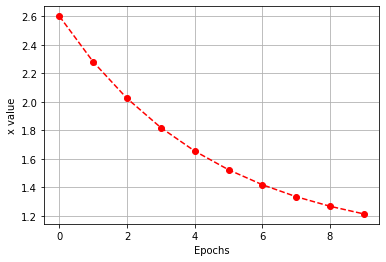

In [27]:
plt.plot(result, '--o', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('x value')
plt.grid()
plt.show()

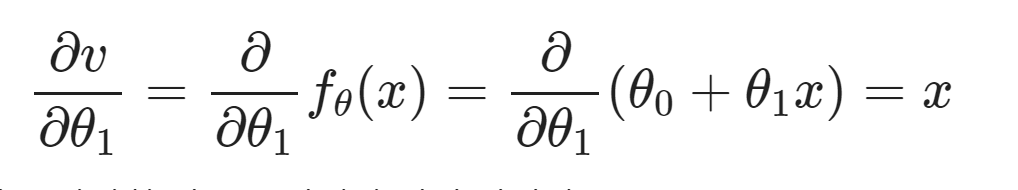